In [2]:
%pylab inline
import numpy as np
import pylab as pl
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import tree

Populating the interactive namespace from numpy and matplotlib


## 1.Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

answer: This data contains protein localization sites
### Attribute Information:
1. Sequence Name: Accession number for the SWISS-PROT database 
2. mcg: McGeoch's method for signal sequence recognition. 
3. gvh: von Heijne's method for signal sequence recognition. 
4. lip: von Heijne's Signal Peptidase II consensus sequence score. Binary attribute. 
5. chg: Presence of charge on N-terminus of predicted lipoproteins. Binary attribute. 
6. aac: score of discriminant analysis of the amino acid content of outer membrane and periplasmic proteins. 
7. alm1: score of the ALOM membrane spanning region prediction program. 
8. alm2: score of ALOM program after excluding putative cleavable signal regions from the sequence.

###  Number of Instances:  
336 
###  Number of Attributes.
E.coli dataset:  8 ( 7 predictive, 1 name )

### Class Distribution
 * cp  (cytoplasm)                                    143
 * im  (inner membrane without signal sequence)        77               
 * pp  (perisplasm)                                    52
 * imU (inner membrane, uncleavable signal sequence)   35
 * om  (outer membrane)                                20
 * omL (outer membrane lipoprotein)                     5
 * imL (inner membrane lipoprotein)                     2
 * imS (inner membrane, cleavable signal sequence)      2
 
### Missing Attribute Values:
None.

## 2.Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content of the dataset.

answer:
    1. It doesn't have missing data 
    2. The features are numeric

In [3]:
def stats(x):
    return pd.Series([x.count(),x.min(),
               x.quantile(.25),x.median(),
               x.quantile(.75),x.mean(),
               x.max(),
               x.ptp(),x.var(),
               x.std()],
              index = ['Count','Min',
                       'Q1','Median','Q3','Mean',
                       'Max','Range',
                       'Var','Std'])

In [4]:
fileURL = 'ecoli.processed.data'
ecoli = pd.read_csv(fileURL,names= ['name','mcg', 'gvh', 'lip','chg','aac','alm1',
                                  'alm2','target'],header= None)
ecoli = ecoli.dropna()

### 3.1 feature data statistics

In [5]:
ecoli[ecoli.columns[1:-1]].apply(stats)

,mcg,gvh,lip,chg,aac,alm1,alm2
Count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
Min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
Q1,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
Median,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
Q3,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
Mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
Max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000
Range,0.890000,0.840000,0.520000,0.500000,0.880000,0.970000,0.990000
Var,0.037882,0.021950,0.007831,0.000744,0.014976,0.046549,0.043853
Std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411


### 3.2 feature data histograms

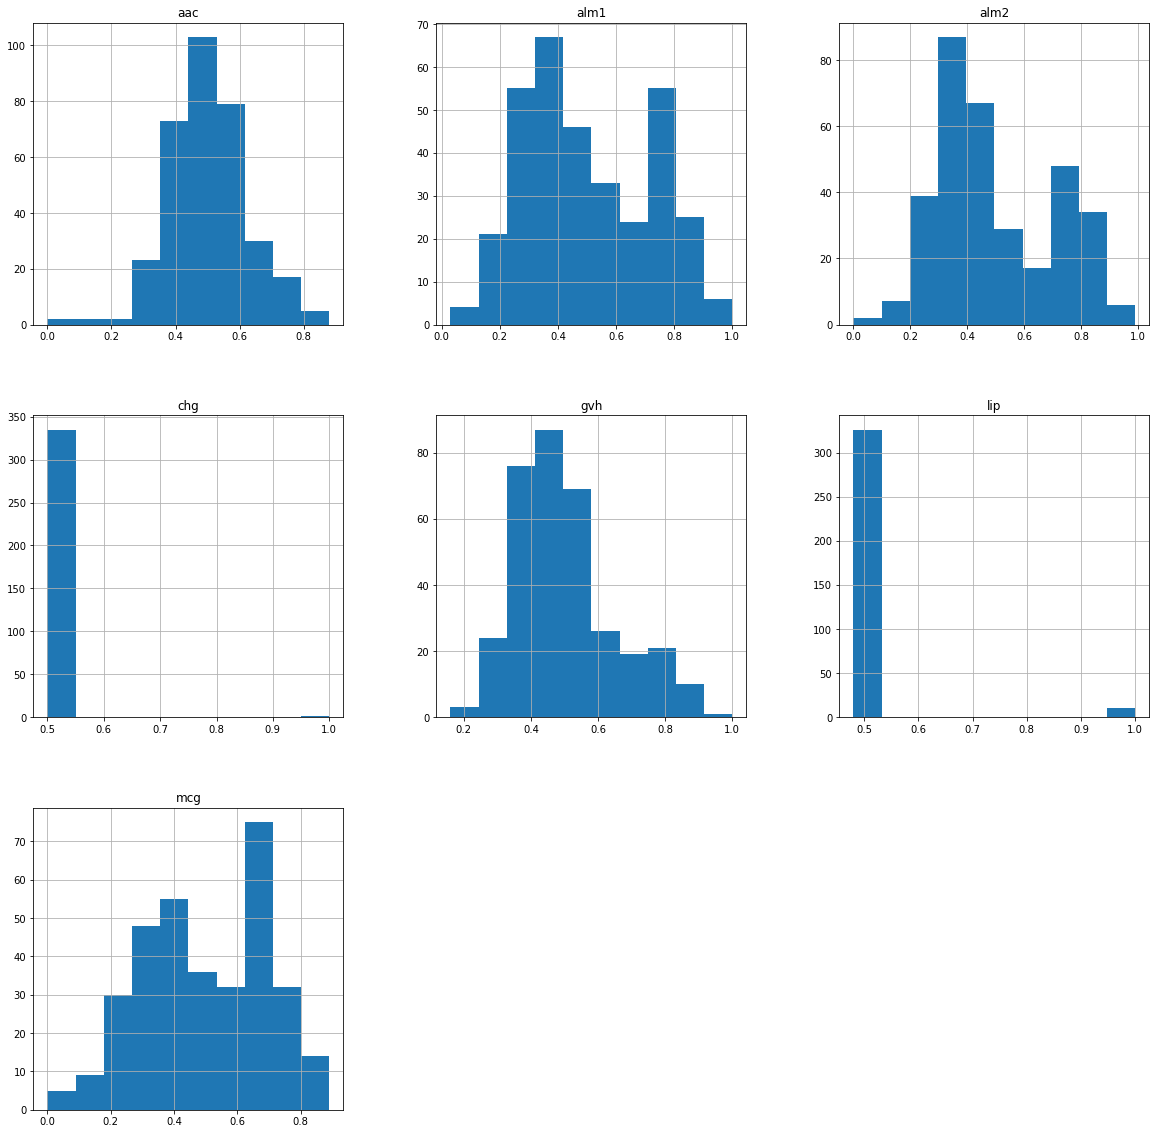

In [6]:
hist = ecoli.hist(figsize = (20,20))

### 3.3 feature data boxplots

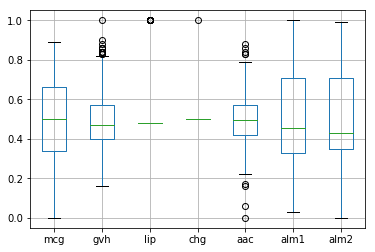

In [7]:
hist = ecoli.boxplot(figsize = (30,30))

## 3.Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data

In [8]:
ecoli.head()

,name,mcg,gvh,lip,chg,aac,alm1,alm2,target
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [9]:
featuresName = list(ecoli.columns[1:8])
targetNames = np.asarray(['cp', 'im', 'imS','imL','imU','om',
                                  'omL','pp'])

In [10]:
X = ecoli.iloc[:,1:-1].as_matrix()
y = ecoli.iloc[:,-1].as_matrix()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

## 4. Use that code snippet to create a visualization of your tree.

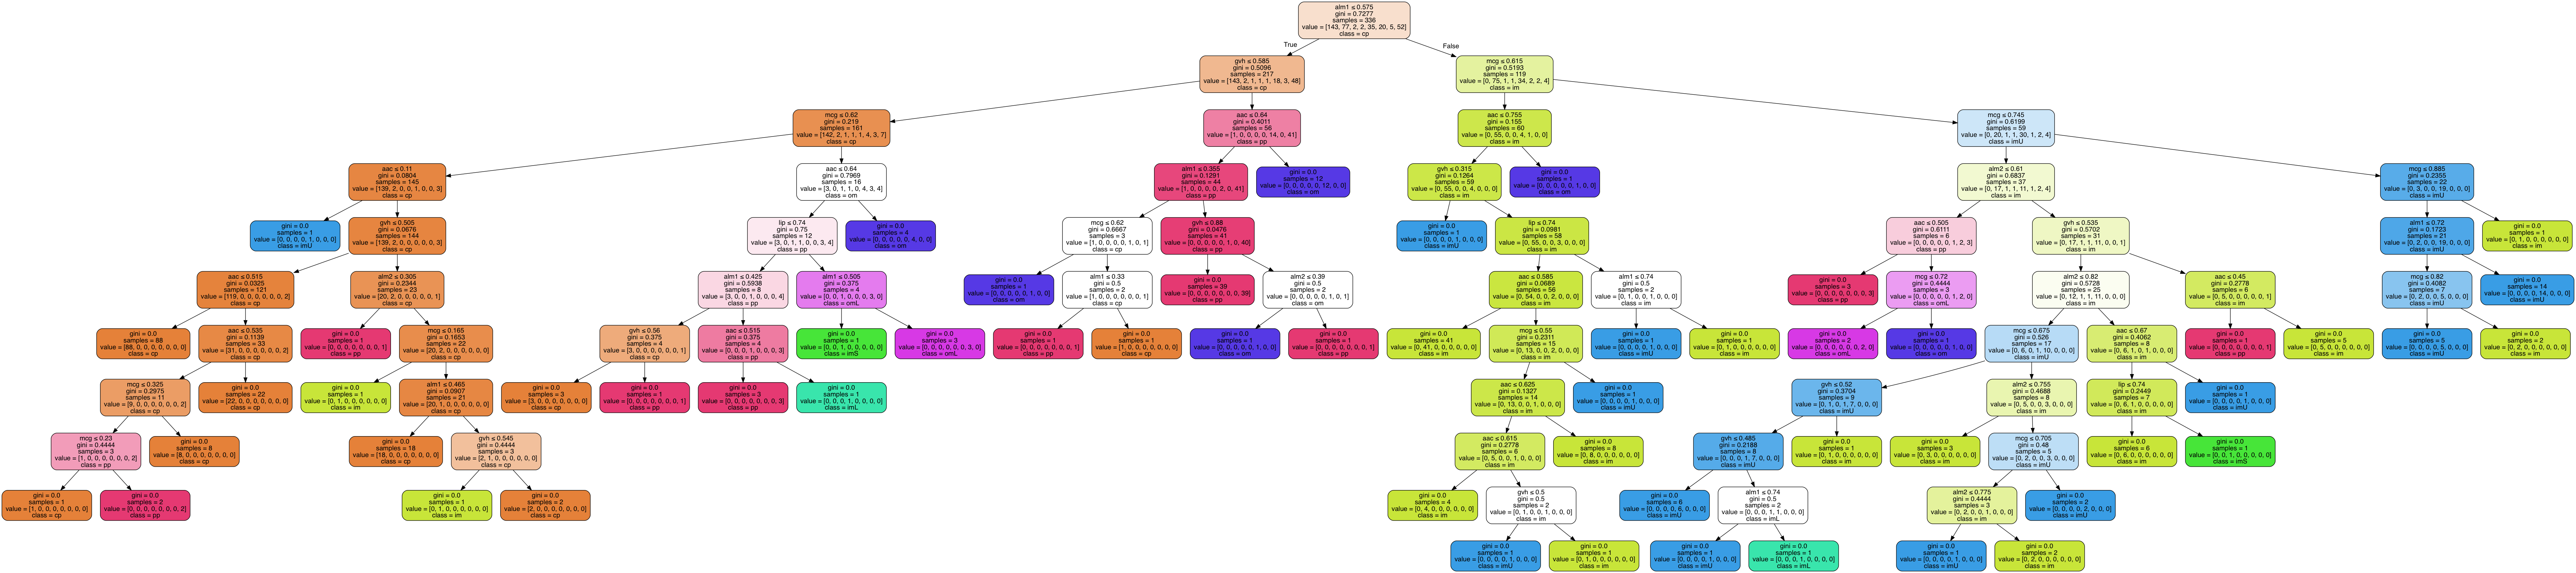

In [11]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=featuresName,  
                         class_names=targetNames,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

## 5.Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [18]:
print(clf.predict([[ 0.05189064,  0.38632592,  0.70669073,  0.84196968,  0.35514607,
         0.21970512,  0.94052934]]))

['cp']


answer: we start from the root of the tree.
* 1st step: the value of the feature 'alm1' is 0.219 which is less than 0.575 so it goes to the left child of the root Node
* 2nd step: the value of the feature 'gvh' is 0.386 which is less than 0.585 so it goes to the left child of the parent Node
* 3rd step: the value of the feature 'mcg' is 0.05 which is less than 0.62 so it goes to the left child of the parent Node
* 4th step: the value of the feature 'aac' is 0.355 which is more than 0.11 so it goes to the right child of the parent Node
* 5th step: the value of the feature 'gvh' is 0.386 which is less than 0.505 so it goes to the left child of the parent Node
* 6th step: the value of the feature 'aac' is 0.355 which is more than 0.515 so it goes to the left child of the parent Node 
and that node is a leaf node which is classified to 'cp'

yes it can be improved in those ways:
* decreasing the max depth of the decision tree. This can reduce the overfitting of our model
* change the criteion to 'entropy' used by the ID3 instead of 'gini' of CART to see whether it can be improved
* increase the number of min_samples_split ,min_samples_leaf, min_impurity_split or min_weight_fraction_leaf to prevent the overfitting of the model
* decrease the max_leaf_nodes to reduce the overfitting of the model